In [1]:
import  NN3L
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def make_data_set(data):
    #first column is label Y
    n = data.shape[1]
    train_len = int(n*0.6)
    data_train = data[:,:train_len]
    data_test  = data[:,train_len:]
    X_train = data_train[1:,:]/255
    m = X_train.shape[1]
    X_train.reshape((784,m))
    Y_train = data_train[0,:]
    Y_train=np.reshape(Y_train,(1,m))
    Y_train_preprocess=OneHotEncoder(Y_train)
    X_test  = data_test[1:,:]/255
    n = X_test.shape[1]
    X_test.reshape((784,n))
    Y_test  = data_test[0,:]
    Y_test=np.reshape(Y_test,(1,n))
    return (X_train,Y_train_preprocess,Y_train,X_test,Y_test)

In [3]:

def OneHotEncoder(data):
    m = data.shape[1]
    print(data.shape)
    encoder =[[0]*10]*m
    Y = np.array(encoder)
    print(Y.shape)
    for i in range(m):
        Y[i,data[0,i]]=1
    return Y.T


In [4]:
model = NN3L.Network([784,100,100,10])
#put address of train.csv 
file_train ='/home/vikrant/6th Sem/DeepLearningCourse/Hand_written_digit/train.csv'
df = pd.read_csv(file_train)
data = df.T 
#print(data.head())
data = data.values
#np.random.shuffle(data)
#print(data[0:5,0:5])
X_train,Y_train,Y_train_test,X_test,Y_test = make_data_set(data)
print('log: \n','*'*50)
model.train(X_train,Y_train,0.6,500)
print('*'*50)

(1, 25200)
(25200, 10)
log: 
 **************************************************
epoch : 1  cost : 6.931533494747616
epoch : 2  cost : 6.042401991448234
epoch : 3  cost : 5.397115388330268
epoch : 4  cost : 4.923286352023064
epoch : 5  cost : 4.569106175747938
epoch : 6  cost : 4.298259137776003
epoch : 7  cost : 4.084775108682308
epoch : 8  cost : 3.9083085759495058
epoch : 9  cost : 3.748296527955305
epoch : 10  cost : 3.5750381184384428
epoch : 11  cost : 3.364466846380635
epoch : 12  cost : 3.262659744464735
epoch : 13  cost : 3.260640502077713
epoch : 14  cost : 3.2594106422288336
epoch : 15  cost : 3.258461931030617
epoch : 16  cost : 3.2575721420088044
epoch : 17  cost : 3.256730701792308
epoch : 18  cost : 3.255899121306884
epoch : 19  cost : 3.255069186701761
epoch : 20  cost : 3.2542272276228306
epoch : 21  cost : 3.2533652988282884
epoch : 22  cost : 3.2524748412601507
epoch : 23  cost : 3.251548147224988
epoch : 24  cost : 3.250577125723884
epoch : 25  cost : 3.249553284047

In [5]:
Y_pre_train = model.predict_mult(X_train)
Y_pre_train = np.squeeze(Y_pre_train)
Y_train_test = np.squeeze(Y_train_test)

Y_pre_dev=model.predict_mult(X_test)
Y_pre_dev=np.squeeze(Y_pre_dev)
Y_test=np.squeeze(Y_test)

In [6]:
from sklearn.metrics import accuracy_score
print("Train set accuracy: ",accuracy_score(Y_train_test,Y_pre_train)*100,"%")
print("Dev set accuracy :",accuracy_score(Y_test,Y_pre_dev)*100,"%")
model.save("NN3L_digit")


Train set accuracy:  96.63095238095238 %
Dev set accuracy : 95.38095238095238 %


In [7]:
def reshape_for_prediction_and_plot(X):
    pre = np.reshape(X,(1,784))
    plot = np.reshape(X,(28,28))
    pre = pre/255
    return (pre,plot)

In [10]:
#put address of test.csv 
file = "/home/vikrant/6th Sem/DeepLearningCourse/Hand_written_digit/test.csv"
test_df = pd.read_csv(file)
test = test_df.values


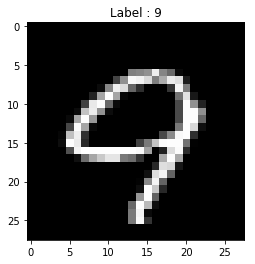

In [12]:
#change index to view diffenrent example
pre_test,img=reshape_for_prediction_and_plot(test[392])
label = np.squeeze(model.predict_mult(pre_test.T))
plt.title("Label : "+str(label))
plt.imshow(img,cmap='gray')
plt.show()